## Table of Content

>>[Table of Content](#scrollTo=HIDO1qt3P8ju)

>>[Import the libraries](#scrollTo=9F4evsFAORRI)

>>[Mount the drive and set the path](#scrollTo=EAUb89vrOhzh)

>>[Describe Image through visualization](#scrollTo=Af9VgaDMOqbd)

>>[Load Image and change its color code](#scrollTo=LRElHa7sO5B_)

>>[Change the RGB color code to HEX color code](#scrollTo=N0ie-n8JPBsT)

>>[Extract the dominant colors from the given Image](#scrollTo=k4x1RGrMPLLz)

>>[Sample Output # 1](#scrollTo=bhnA2mPlPXsv)

>>[Sample Output # 2](#scrollTo=XKdnEZXvPfwn)

>>[Sample Output # 3](#scrollTo=Un3XeLd5PhjE)

>>[References](#scrollTo=xpItcr3xRCNB)



## Import the libraries

In [ ]:
# import the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
from collections import Counter

%matplotlib inline

## Mount the drive and set the path

In [ ]:
# function to mount the google drive and change the path to Sample_Images folder
def mount_drive():
  drive.mount("/content/drive")
  %cd drive/MyDrive/Sample_Images

In [ ]:
mount_drive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Sample_Images'
/content/drive/MyDrive/Sample_Images


## Describe Image through visualization

In [ ]:
# this function will output the image, image shape and input type.
def describe_image(img_path):
  img = cv2.imread(img_path)
  print("Image shape : ",img.shape)
  print("Type : ", type(img))
  print("Displaying the Image .....")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.axis("off")

Image shape :  (2736, 3648, 3)
Type :  <class 'numpy.ndarray'>
Displaying the Image .....


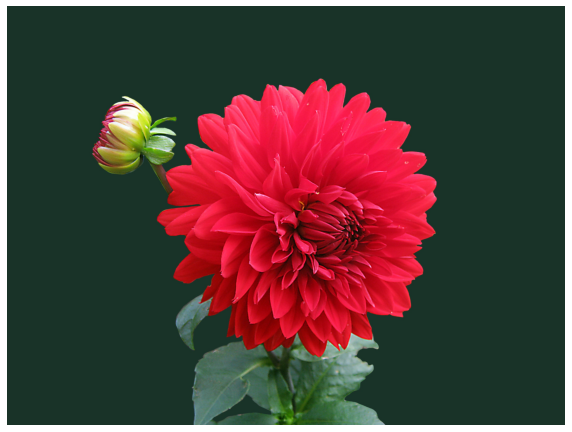

In [ ]:
describe_image("img.jpg")

## Load Image and change its color code

In [ ]:
# returns the image in the numpy array type
def load_image(img_path):
  img = cv2.imread(img_path)
  # converts the color code to BGR to RGB 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

## Change the RGB color code to HEX color code

In [ ]:
# converts the RGB colors to HEX colors codes
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Extract the dominant colors from the given Image

In [ ]:
def extract_dominant_colors(img_path, no_colors):
  '''
    This function extract the given dominant colors from an image and plot its distribution.
    Also, outputs the HEX and RGB code of the most dominant color in an image.

    Arguments:
    
    img_path : specificies the image path 
    no_colors: Number of dominant colors we want

  '''
  # describes the given image
  describe_image(img_path)
  
  img = load_image(img_path)
  # resizing the image to smaller its dimensions
  resized_img = cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)
  # reshaping the image into 2 dimension, because KMeans accepts input in 2d
  resized_img = resized_img.reshape(resized_img.shape[0] * resized_img.shape[1], 3)
  

  kmean = KMeans(n_clusters=no_colors)
  codes = kmean.fit_predict(resized_img)

  freq = Counter(codes)
  col = kmean.cluster_centers_

  colors = [ col[i] for i in freq.keys()]
  hexColors = [ RGB2HEX(colors[i]) for i in freq.keys()]
  rgbColors = [colors[i] for i in freq.keys()]

  # plotting the pie chart of color distribution of the image
  plt.figure(figsize=(10,10))
  plt.pie(freq.values(), colors=hexColors)
  plt.title(f"Dominant Color \nHEX code: {hexColors[0]} \nRGB Code : {rgbColors[0]}")
  centre_circle = plt.Circle((0, 0), 0.6, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.show()

Resized the image to smaller its dimension, otherwise the `kmeans` will take lot of time for dense image. Also, reshaped it into 2d, because `KMeans` accepts input in 2d. `KMeans` creates the clusters of the colors within the image, `Counter` method of `Collections` package counts values of same categories and creates a dictionary, `kmean.cluster_centers_` returns the colors within the image.

## Sample Output # 1

Image shape :  (2736, 3648, 3)
Type :  <class 'numpy.ndarray'>
Displaying the Image .....


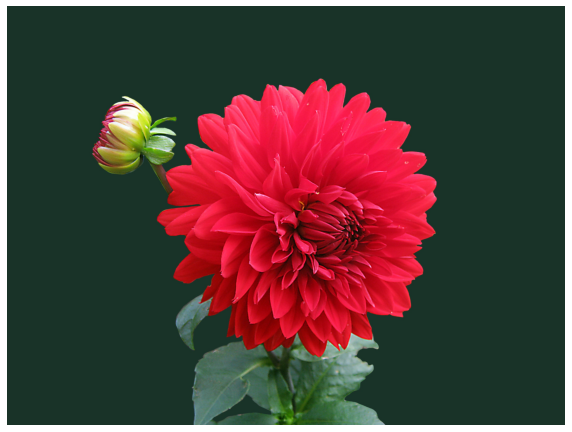

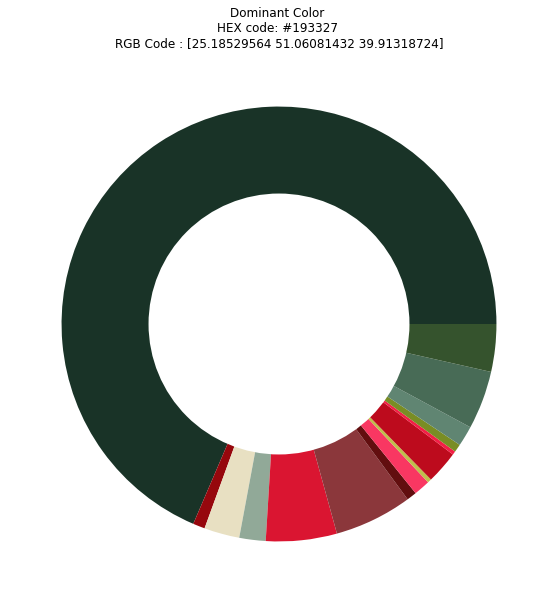

In [ ]:
extract_dominant_colors("img.jpg", 15)

## Sample Output # 2

Image shape :  (168, 299, 3)
Type :  <class 'numpy.ndarray'>
Displaying the Image .....


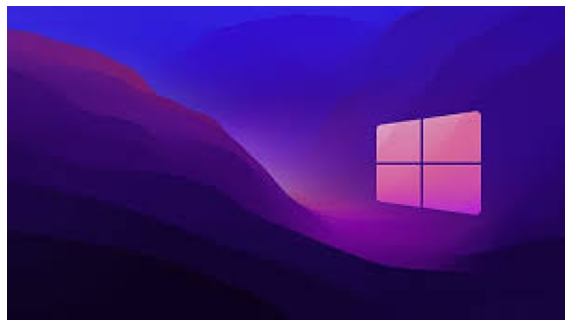

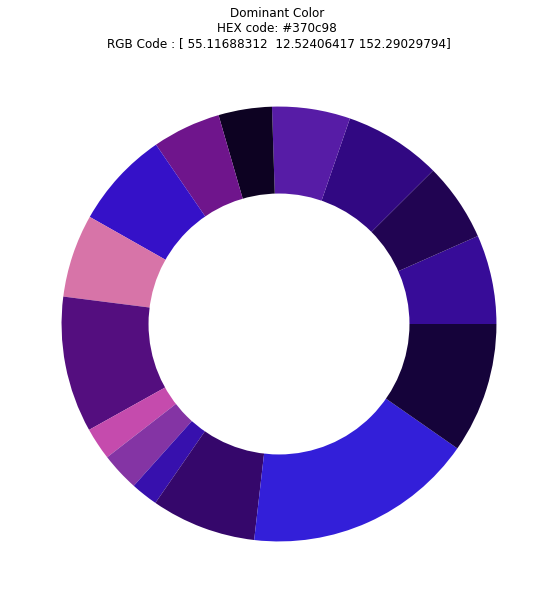

In [ ]:
extract_dominant_colors("windows.jfif", 15)

## Sample Output # 3

Image shape :  (183, 275, 3)
Type :  <class 'numpy.ndarray'>
Displaying the Image .....


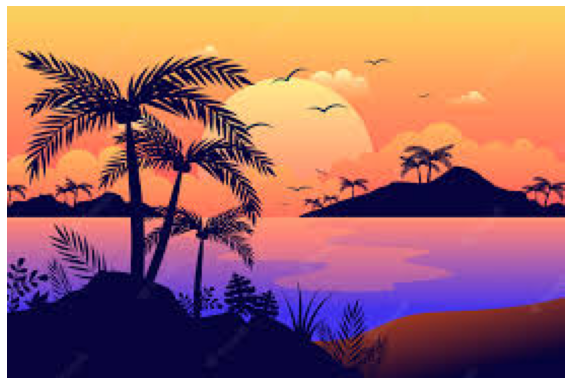

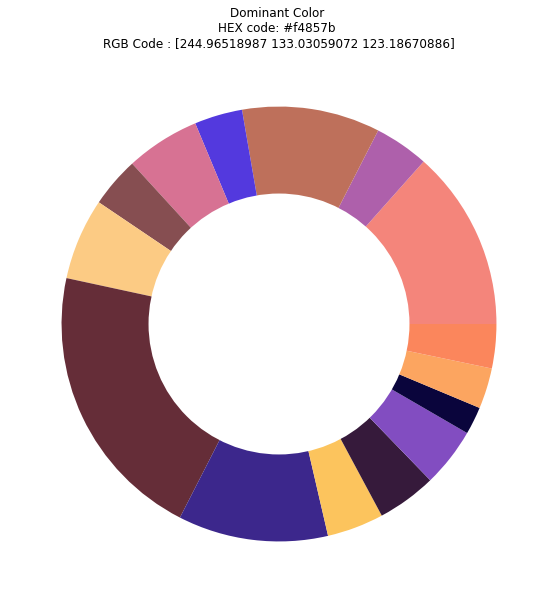

In [ ]:
extract_dominant_colors("nature.jfif", 15)

## References

* https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71